# Equation of state (EOS)
https://wiki.fysik.dtu.dk/ase/tutorials/eos/eos.html
First, do a bulk calculation for different lattice constants:

In [1]:
import numpy as np

In [2]:
from ase import Atoms
from ase.io.trajectory import Trajectory
from ase.calculators.emt import EMT

In [3]:
a = 4.0  # approximate lattice constant
b = a / 2
ag = Atoms('Ag',
           cell=[(0, b, b), (b, 0, b), (b, b, 0)],
           pbc=1,
           calculator=EMT())  # use EMT potential

In [4]:
cell = ag.get_cell()
traj = Trajectory('Ag.traj', 'w')

In [5]:
for x in np.linspace(0.95, 1.05, 5):
    ag.set_cell(cell * x, scale_atoms=True)
    ag.get_potential_energy()
    traj.write(ag)

This will write a trajectory file containing five configurations of FCC silver for five different lattice constans. Now, analyse the result with the `EquationOfState` class and this script:

In [6]:
from ase.io import read
from ase.units import kJ
from ase.eos import EquationOfState

In [7]:
configs = read('Ag.traj@0:5')  # read 5 configurations

100.14189241976 GPa


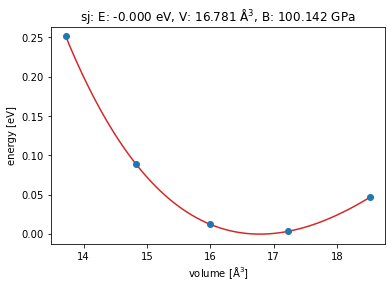

In [8]:
# Extract volumes and energies:
volumes = [ag.get_volume() for ag in configs]
energies = [ag.get_potential_energy() for ag in configs]
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
print(B / kJ * 1.0e24, 'GPa')
eos.plot('Ag-eos.png')